In [112]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from geopy.geocoders import Nominatim

%matplotlib inline
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))

realestate = pd.read_csv("HousePrice2.csv", low_memory = False)
HousePrice = pd.read_csv("HousePrice2.csv",index_col = [0])

Current working directory: /Users/tylerkim/Downloads


In [73]:
realestate = pd.DataFrame(realestate)
HousePrice = pd.DataFrame(HousePrice)

In [74]:
print(realestate.shape)
print(HousePrice.shape)

(2624, 84)
(2624, 83)


In [75]:
HousePrice.head()

,address,latitude,longitude,MapRefNo,Prop_Addr,Unnamed: 0.1,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,"436, Hayward Avenue, Campustown, Ames, Story C...",42.018564,-93.651619,909176150.0,436 HAYWARD AVE,1,909176150,856,126000,30,RL,60.783784,7890,Pave,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,0,3,2010,WD,Normal
1,"3416, West Street, Union Drive, Ames, Story Co...",42.024855,-93.663671,905476230.0,3416 WEST ST,2,905476230,1049,139500,120,RL,42.000000,4235,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,No Fireplace,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,0,2,2009,WD,Normal
2,"3416, West Street, Union Drive, Ames, Story Co...",42.024855,-93.663671,905476230.0,3416 WEST ST,2,905476230,1049,139500,120,RL,42.000000,4235,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,No Fireplace,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,0,2,2009,WD,Normal
3,"320, South 2nd Street, Ames, Story County, Iow...",42.021548,-93.614068,911128020.0,320 S 2ND ST,3,911128020,1001,124900,30,C (all),60.000000,6060,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,No Fireplace,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,0,11,2007,WD,Normal
4,"1524, Douglas Avenue, Broadmoor, Ames, Story C...",42.037391,-93.612207,535377150.0,1524 DOUGLAS AVE,4,535377150,1039,114000,70,RL,80.000000,8146,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,No Fireplace,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,0,5,2009,WD,Normal


In [76]:
realestate.head()
HousePrice.head()

,address,latitude,longitude,MapRefNo,Prop_Addr,Unnamed: 0.1,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,"436, Hayward Avenue, Campustown, Ames, Story C...",42.018564,-93.651619,909176150.0,436 HAYWARD AVE,1,909176150,856,126000,30,RL,60.783784,7890,Pave,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,0,3,2010,WD,Normal
1,"3416, West Street, Union Drive, Ames, Story Co...",42.024855,-93.663671,905476230.0,3416 WEST ST,2,905476230,1049,139500,120,RL,42.000000,4235,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,No Fireplace,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,0,2,2009,WD,Normal
2,"3416, West Street, Union Drive, Ames, Story Co...",42.024855,-93.663671,905476230.0,3416 WEST ST,2,905476230,1049,139500,120,RL,42.000000,4235,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,No Fireplace,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,0,2,2009,WD,Normal
3,"320, South 2nd Street, Ames, Story County, Iow...",42.021548,-93.614068,911128020.0,320 S 2ND ST,3,911128020,1001,124900,30,C (all),60.000000,6060,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,No Fireplace,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,0,11,2007,WD,Normal
4,"1524, Douglas Avenue, Broadmoor, Ames, Story C...",42.037391,-93.612207,535377150.0,1524 DOUGLAS AVE,4,535377150,1039,114000,70,RL,80.000000,8146,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,No Fireplace,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,0,5,2009,WD,Normal


In [77]:
realestate.describe()
HousePrice.describe()
print("realestate columns: ",realestate.columns)
print("HousePrice columns: ", HousePrice.columns)
HousePrice.columns.intersection(realestate.columns)

realestate columns:  Index(['Unnamed: 0', 'address', 'latitude', 'longitude', 'MapRefNo',
       'Prop_Addr', 'Unnamed: 0.1', 'PID', 'GrLivArea', 'SalePrice',
       'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'Fireplace

Index(['address', 'latitude', 'longitude', 'MapRefNo', 'Prop_Addr',
       'Unnamed: 0.1', 'PID', 'GrLivArea', 'SalePrice', 'MSSubClass',
       'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', '

In [78]:
# HousingPrice data
# PID
#Property Location:
#                   
#
#House attributes:
# Ourdoor Veneer: 
#         Numeric: LotFrontage, LotArea, MasVnrArea
#         Categorical: LotShape, LandContour, LotConfig, LandSlope,
#                     BldgType, HouseStyle, 
#                     Exteropr1st, Exteropr2md
#                     MasVnrType, 
#                     ExterQual, ExterCond, 
#                     PavedDrive
#                     WoodDeckSF, 
#                     OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC,
#                     Fence, MiscFeature, MiscVal
# Mechanics: 
#         Numeric: 
#         Categorical: Utilities,
#                      Foundation,
#                      Heating,
#                      HeatingQC,
#                      CentralAir, 
#                      Electrical,
# Indoor Quality: 
#                      Numeric: 
#                                 BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF
#                                 GarageArea,
#                                 1stFlrSF,
#                                 2ndFlrSF, LowQualFinSF
#                  Categorical: 
#                             RoofStyle,
#                             RoofMatl,
#                             BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1,BsmtFullBath, BsmtHalfBath
#                             FullBath, HalfBath,
#                             BedroomAbvGr,
#                             KitchenAbvGr,KitchenQual
#                             TotRmsAbvGrd
#                             Fireplaces,FireplaceQu
#                             GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea,
#                               GarageQual,GarageCond
#  Location:          Numeric: 
#                        
#                      Categorical: 
#                                  Condition1,
#                                  Condition2,
#                                  MSSubClass, MSZoning,Neighborhood
#  Overall Quality: 
#                 OverallQual
#                 OverallCond
#                 YearBuilt
#                 YearRemodAdd
#                   Functional
#Sale info: 
#           'SalePrice', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'

In [79]:
# check in realestate data
# owner info: 
#            'MA_Ownr1', 'MA_Ownr2', 'MA_Line1', 'MA_Line2',
#             'MA_City', 'MA_State', 'MA_Zip1', 'MA_Zip2','Rcrd_Yr', 'Rcrd_Mo',
#              'Inst1_No', 'Inst1_Yr', 'Inst1_Mo', 'Inst1TPr'
# Property Location: 
#              'MapRefNo', 'GeoRefNo', 'Tier', 'Range', 'Prop_Addr','ZngCdPr',
#              'ZngCdSc', 'ZngOLPr', 'ZngOLSc', 'ClassPr_S','Legal_Pr',
#               'SchD_S', 'TxD_S'
# House attributes: 
#               'LndAc_S', 'ImpAc_S',
#               'OthAc_S', 'TtlVal_AsrYr', 'ValType', 'X1TPr_D', 'X1TSc_D', 'X2TPr_D',
#               'X2TSc_D', 'X1TPr_S', 'X1TSc_S', 'X2TPr_S', 'X2TSc_S', 'LndAcX1S',
#               'ImpAcX1S', 'ImpAcX2S', 'HSTtl_D', 'MilVal_D', 'HSTtl_S', 'MilVal_S',
#               'AcreX_S1', 'AcreGr', 'AcreNt_S','Neighborhood', 'LotArea', 'ParType',
#               'BldgNo_S', 'DwlgNo_S', 'BldgType', 'YrBuilt', 'HouseStyle','Foundation', 
#               'RoofMatl', 'Ext1', 'Ext2', 'MasVnrType', 'Heating','Central Air', 'GLA', 
#               'TtlBsmtSF', 'TotRmsAbvGrd', 'Fireplaces','PoolArea', 'GarageType', 'GarYrBlt', 
#                'Cars', 'GarageArea',
# sale info: 'YrSold_YYYY', 'MoSold_MM', 'SalePrice', 'SaleType', 'SaleCond',
#        'ParclRel', 'PA-Nmbr', 'PA-PreD', 'PA-Strt', 'PA-StSfx', 'PA-PostD',
#        'PA-UnTyp', 'PA-UntNo', 'Date', 'Source', 'NmbrBRs'
    

In [80]:
cols = HousePrice.columns
num_cols = HousePrice._get_numeric_data().columns
num_cols
num_df = HousePrice[list(set(num_cols) - set(['PID',"MSSubClass"]))]
num_df.columns

Index(['GarageYrBlt', 'Fireplaces', '3SsnPorch', 'BsmtFullBath', 'MapRefNo',
       '1stFlrSF', 'HalfBath', 'TotalBsmtSF', 'GrLivArea', 'YearRemodAdd',
       'ScreenPorch', 'MiscVal', 'MasVnrArea', 'MoSold', 'BsmtFinSF1',
       'Unnamed: 0.1', 'YearBuilt', 'longitude', 'FullBath', 'BedroomAbvGr',
       'OpenPorchSF', 'LotFrontage', 'BsmtHalfBath', 'OverallQual', 'LotArea',
       'latitude', 'WoodDeckSF', 'GarageCars', 'OverallCond', 'LowQualFinSF',
       'KitchenAbvGr', 'GarageArea', '2ndFlrSF', 'TotRmsAbvGrd',
       'EnclosedPorch', 'PoolArea', 'SalePrice', 'BsmtFinSF2', 'BsmtUnfSF',
       'YrSold'],
      dtype='object')

In [81]:
len(num_df.columns)

40

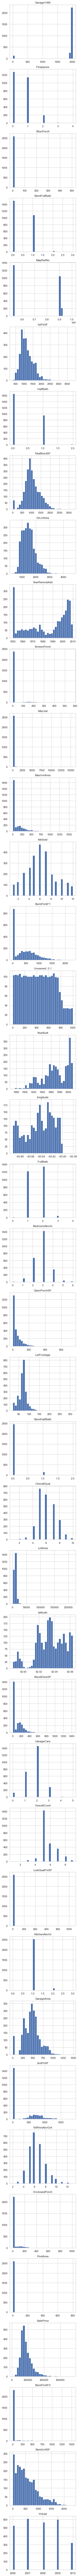

In [82]:
fig, axs = plt.subplots(len(num_df.columns),figsize=(5, 200))
for n, col in enumerate(num_df.columns):
    num_df[col].hist(ax=axs[n], bins = 30)
    axs[n].set_title(col)

<AxesSubplot:>

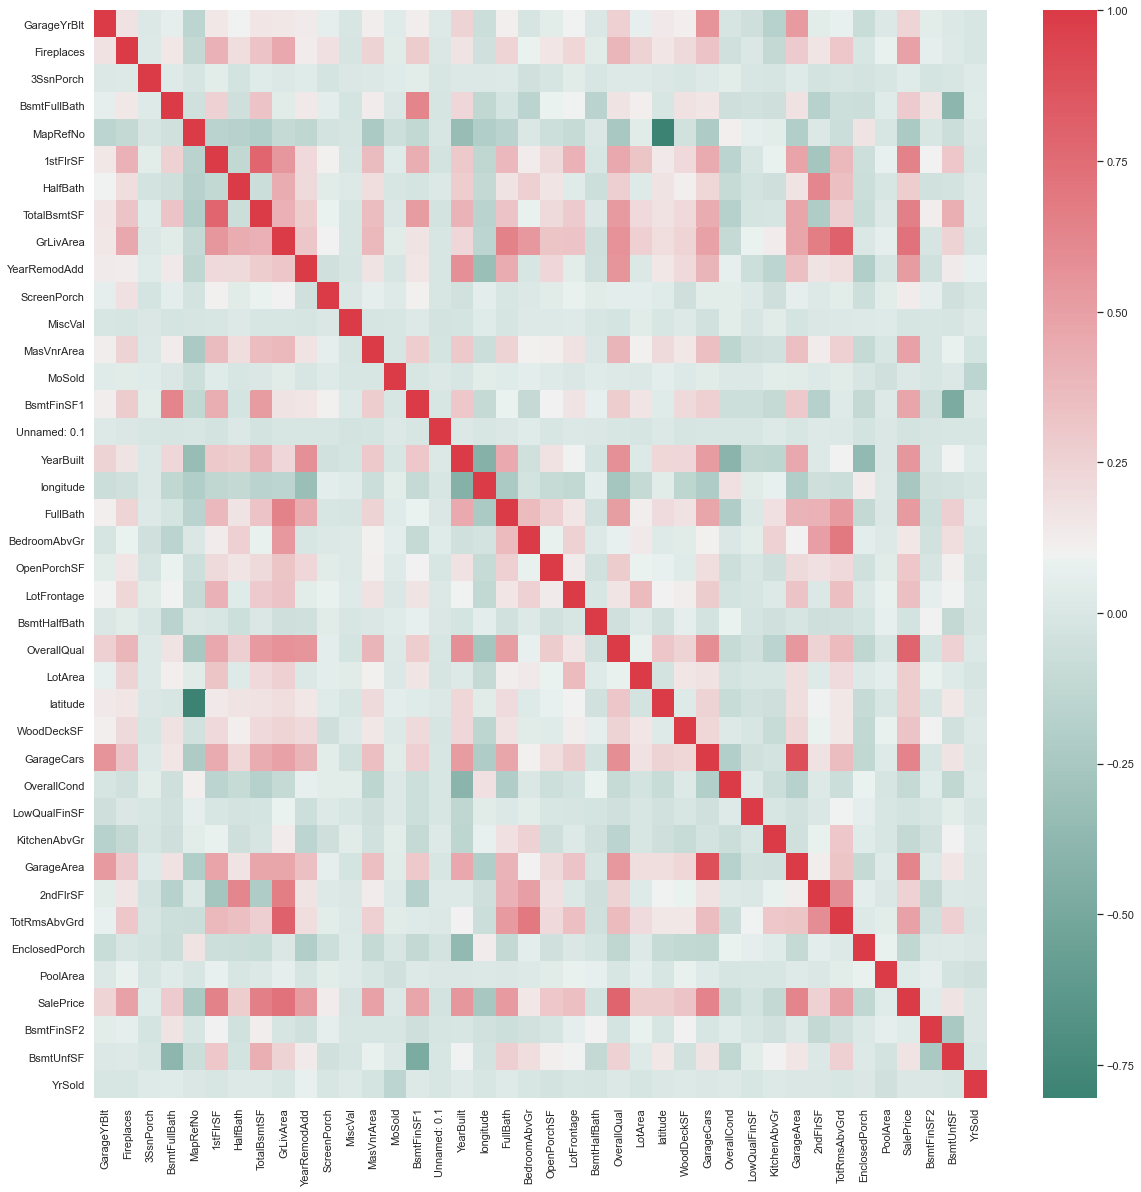

In [83]:
#correlation matrix of numeric variables
fig = plt.figure(figsize =(20,20))
ax = fig.add_subplot(111)
#cmap = sns.color_palette("coolwarm", as_cmap = True)
cmap = sns.diverging_palette(170,10,as_cmap = True)
corr = num_df.corr()
sns.heatmap(corr, xticklabels = corr.columns.values, 
                  yticklabels = corr.index.values,
                  cmap = cmap)

In [84]:
categorical = list(set(cols) - set(num_cols))

In [85]:
for feature in categorical: 
    print(HousePrice[feature].value_counts())
    print('')

TA           2398
No Garage     131
Fa             67
Gd             14
Po             11
Ex              3
Name: GarageCond, dtype: int64

Y    2375
N     188
P      61
Name: PavedDrive, dtype: int64

Gtl    2500
Mod     111
Sev      13
Name: LandSlope, dtype: int64

Typ     2441
Min2      67
Min1      57
Mod       33
Maj1      18
Maj2       7
Sal        1
Name: Functional, dtype: int64

Gable      2098
Hip         478
Gambrel      18
Flat         16
Mansard      10
Shed          4
Name: RoofStyle, dtype: int64

WD       2433
New        80
COD        51
ConLD      23
CWD        12
ConLw       8
ConLI       7
Con         5
Oth         4
VWD         1
Name: SaleType, dtype: int64

TA             1188
Gd             1093
Ex              191
Fa               80
No Basement      70
Po                2
Name: BsmtQual, dtype: int64

No             1740
Av              349
Gd              246
Mn              217
No Basement      72
Name: BsmtExposure, dtype: int64

No Fireplace    1274
Gd    

In [86]:
missingRows = HousePrice.isnull().any(axis = 1)
missingCols = HousePrice.isnull().any(axis = 0)
HousePrice.columns[missingCols]

Index(['address', 'latitude', 'longitude', 'MapRefNo', 'Prop_Addr'], dtype='object')

Text(0.5, 1.0, 'Proportion of Missing Values')

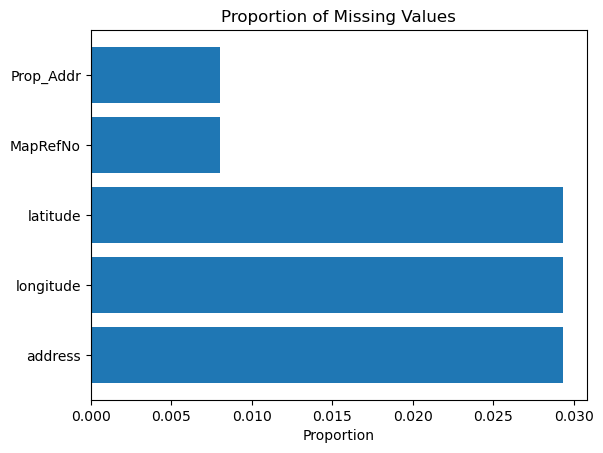

In [87]:
#count NA
prop_miss = HousePrice.isna().mean().sort_values(ascending = False)
prop_miss = prop_miss[prop_miss>0].reset_index()
prop_miss.columns = ["Variable","Proportion missing" ]
plt.rcdefaults()
fig,ax = plt.subplots()

ax.barh(prop_miss["Variable"], prop_miss["Proportion missing"])
ax.set_xlabel("Proportion")
ax.set_title("Proportion of Missing Values")

In [89]:
HousePrice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2624 entries, 0 to 2623
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        2547 non-null   object 
 1   latitude       2547 non-null   float64
 2   longitude      2547 non-null   float64
 3   MapRefNo       2603 non-null   float64
 4   Prop_Addr      2603 non-null   object 
 5   Unnamed: 0.1   2624 non-null   int64  
 6   PID            2624 non-null   int64  
 7   GrLivArea      2624 non-null   int64  
 8   SalePrice      2624 non-null   int64  
 9   MSSubClass     2624 non-null   int64  
 10  MSZoning       2624 non-null   object 
 11  LotFrontage    2624 non-null   float64
 12  LotArea        2624 non-null   int64  
 13  Street         2624 non-null   object 
 14  LotShape       2624 non-null   object 
 15  LandContour    2624 non-null   object 
 16  Utilities      2624 non-null   object 
 17  LotConfig      2624 non-null   object 
 18  LandSlop

In [90]:
# drop: PoolQC, MiscFeatures, Alley, Fence
# impute: fireplaceQual:NA-No Fireplace
#         GarageFinish: NA-No Garage
#           GarageQual: NA-No Garage

def cat_miss(var, value): 
    mis_var = HousePrice[var].isna()
    HousePrice.loc[mis_var,var]= value
cat_miss('Electrical', 'SBrkr')  #impute Electrical missing with the most frequent value
cat_miss('MasVnrType', 'None')
cat_miss('FireplaceQu','No Fireplace')

def num_miss(var, value): 
    HousePrice[var] = HousePrice[var].fillna(value)
    return 
    
num_miss('BsmtFullBath', 0)
num_miss('BsmtHalfBath', 0)
num_miss('GarageCars', 2)
num_miss('GarageArea', \
         HousePrice[HousePrice['GarageCars']==2].mean()['GarageArea'])
num_miss('MasVnrArea',0)
num_miss('GarageYrBlt',0)

# bsm_var2 = HousePrice[['BsmtFinSF1']].isna()
# mis = HousePrice['BsmtFinSF1'].isna()
# HousePrice.loc[mis,] = HousePrice.loc[mis,].fillna(0)

In [91]:
gr_var = ['GarageFinish', 'GarageQual', 'GarageYrBlt','GarageCond', 'GarageType']
HousePrice[gr_var] = HousePrice[gr_var].fillna('No Garage')
bsm_var = ['BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtCond','BsmtQual']
HousePrice[bsm_var] = HousePrice[bsm_var].fillna('No Basement')
num_bsmt = ['BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF']
HousePrice[num_bsmt] = HousePrice[num_bsmt].fillna(0)
# Impute LotFrontage using the type of dwelling in the sell

HousePrice1 = HousePrice[['MSSubClass','LotFrontage']]

LF_dict = HousePrice1.groupby('MSSubClass').mean().to_dict()
rowmissing = HousePrice1.LotFrontage.isnull()
HousePrice1.loc[rowmissing,'LotFrontage']= \
   HousePrice1[rowmissing].apply(lambda x: LF_dict['LotFrontage'][x[0]], axis = 1)
# one LotFrontage is missing because of missing group mean(only one value). 
# Because the total LotArea in this observation is quite small, I will use the the smallest group mean to impute
test = HousePrice1['LotFrontage'].isnull()
HousePrice1 = HousePrice1.fillna(HousePrice1.groupby('MSSubClass').mean().min())
HousePrice[['MSSubClass','LotFrontage']] = HousePrice1

HousePrice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2624 entries, 0 to 2623
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        2547 non-null   object 
 1   latitude       2547 non-null   float64
 2   longitude      2547 non-null   float64
 3   MapRefNo       2603 non-null   float64
 4   Prop_Addr      2603 non-null   object 
 5   Unnamed: 0.1   2624 non-null   int64  
 6   PID            2624 non-null   int64  
 7   GrLivArea      2624 non-null   int64  
 8   SalePrice      2624 non-null   int64  
 9   MSSubClass     2624 non-null   int64  
 10  MSZoning       2624 non-null   object 
 11  LotFrontage    2624 non-null   float64
 12  LotArea        2624 non-null   int64  
 13  Street         2624 non-null   object 
 14  LotShape       2624 non-null   object 
 15  LandContour    2624 non-null   object 
 16  Utilities      2624 non-null   object 
 17  LotConfig      2624 non-null   object 
 18  LandSlop

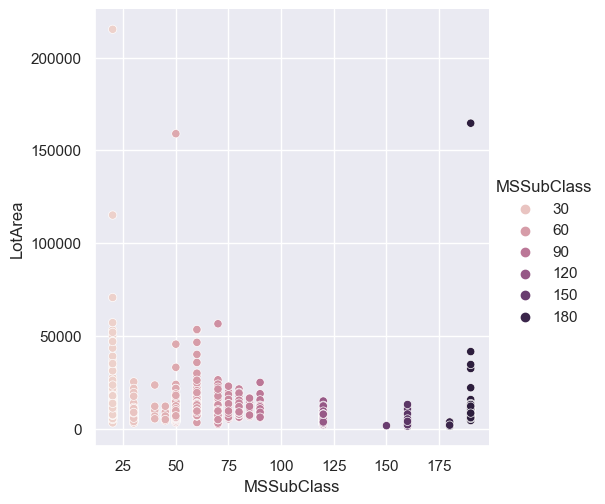

In [92]:
sns.set(rc = {'figure.figsize': (5,5)}, font_scale = 1)
sns.relplot(
    data = HousePrice, x = "MSSubClass", y = "LotArea",
           hue = 'MSSubClass',
           kind = "scatter")

# from sklearn import linear_model
# ols = linear_model.LinearRegression()

# ols.fit(x = HousePrice['LotArea'], Y = )

In [93]:
#check if there are any duplicated data
print('duplicated in realestate: {}'.format(realestate.duplicated().sum()))
print('duplicated in HousePrice: {}'.format(HousePrice.duplicated().sum()))

#keep only unique rows in realestate data
realestate = realestate.drop_duplicates()
realestate.shape

duplicated in realestate: 0
duplicated in HousePrice: 44


(2624, 84)

In [94]:
MapRefDup = realestate.loc[realestate.duplicated('MapRefNo', keep = False), ]

In [95]:
Nh_cnts = HousePrice.groupby('Neighborhood')['PID'].count().sort_values(ascending = False)

In [96]:
HousePrice.SalePrice.describe()

count      2624.000000
mean     177875.010671
std       75776.355321
min       12789.000000
25%      129887.500000
50%      159000.000000
75%      208925.000000
max      755000.000000
Name: SalePrice, dtype: float64

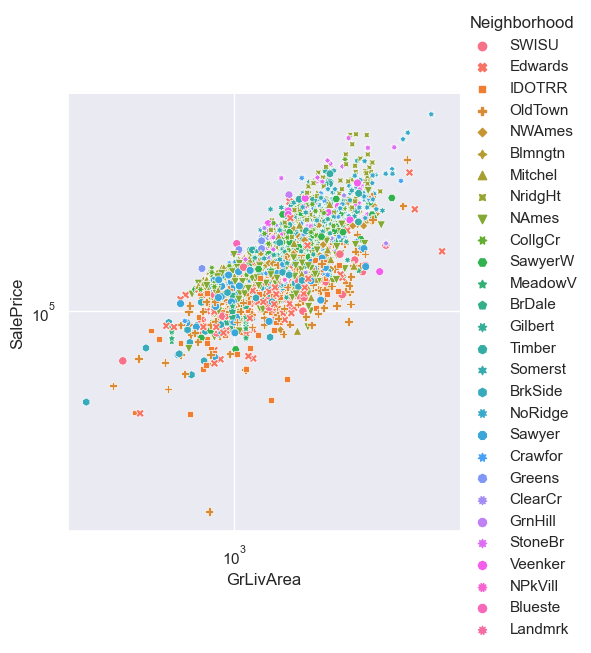

In [97]:
sns.set(rc = {'figure.figsize': (15,15)})
g = sns.relplot(data = HousePrice, x = "GrLivArea", y = "SalePrice", 
                hue = "Neighborhood",
                style = "Neighborhood")
g.set(xscale = "log")
g.set(yscale = "log")
plt.show()

<AxesSubplot:>

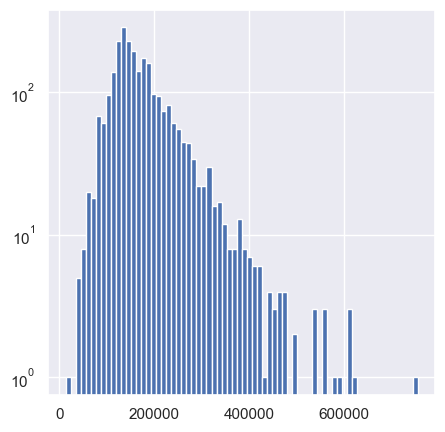

In [98]:
HousePrice['SalePrice'].hist(figsize = (5,5), bins = 70, log = True) #data transformation is needed

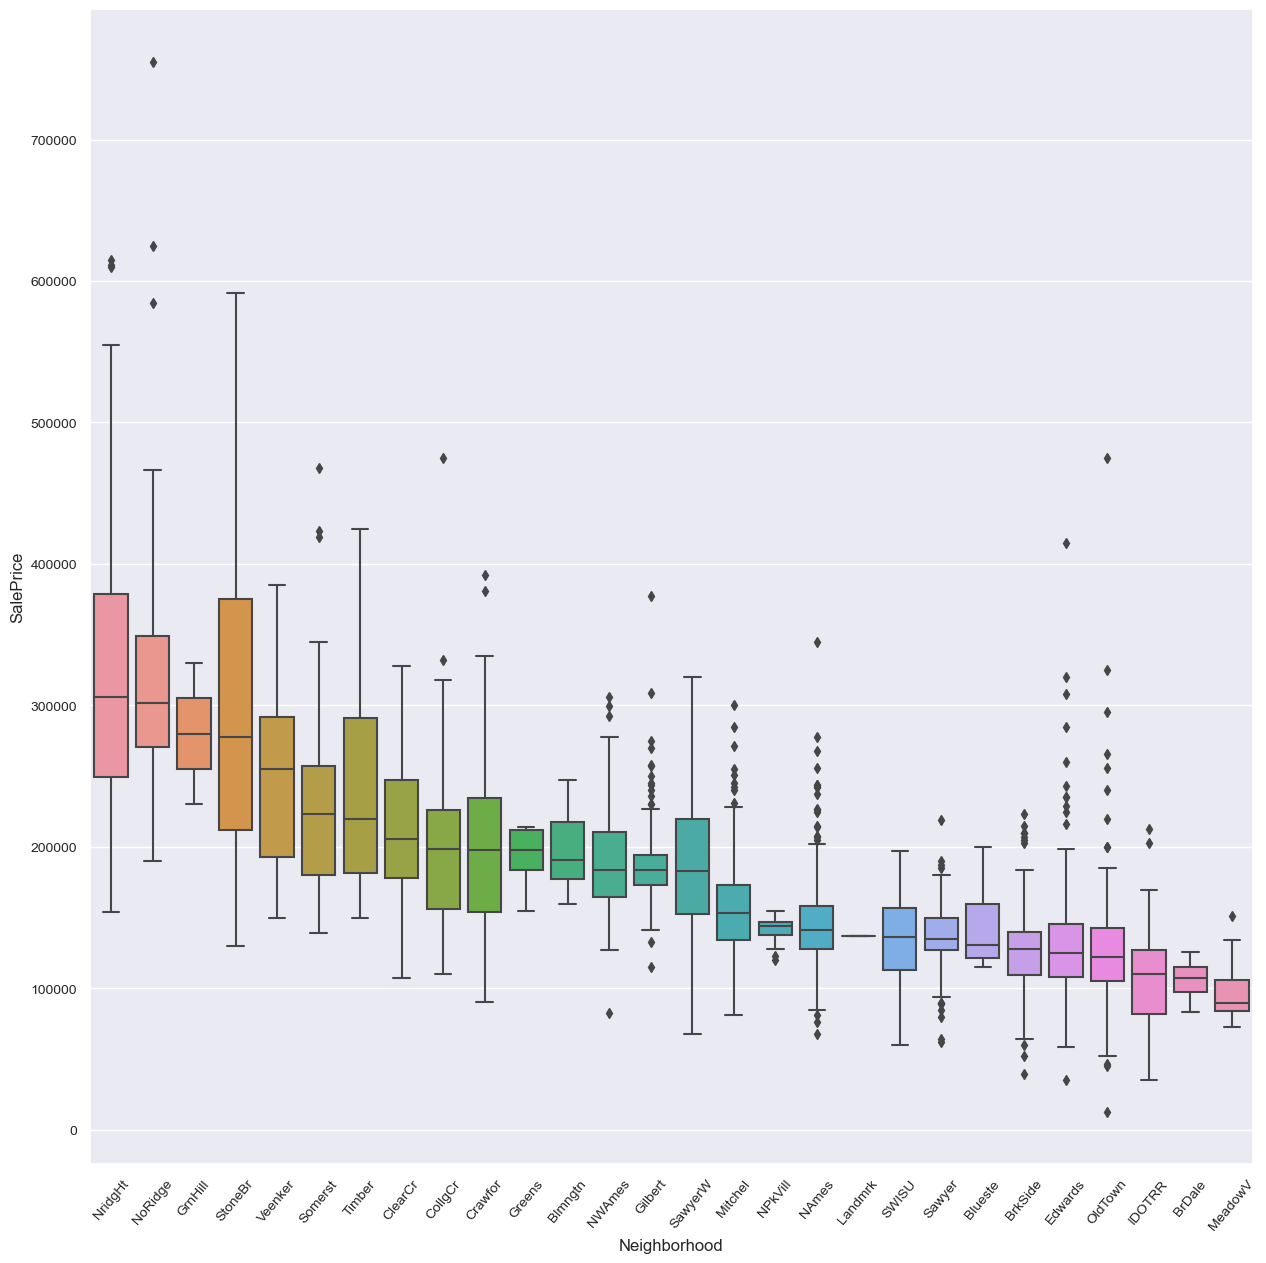

In [103]:
sns.set(style = 'darkgrid')

my_order= HousePrice.groupby('Neighborhood')['SalePrice'].median()   \
                    .sort_values(ascending = False)   \
                    .index
ax = sns.boxplot(x = "Neighborhood", y = "SalePrice",
                 data = HousePrice,
                order = my_order)
ax.tick_params(labelsize = 10, labelrotation = 50)
plt.yticks(rotation = 0)
plt.show()
#plt.setp(ax.get_legend().get_texts(), fontsize='200') # for legend text
#plt.setp(ax.get_legend().get_title(), fontsize='250') # for legend title

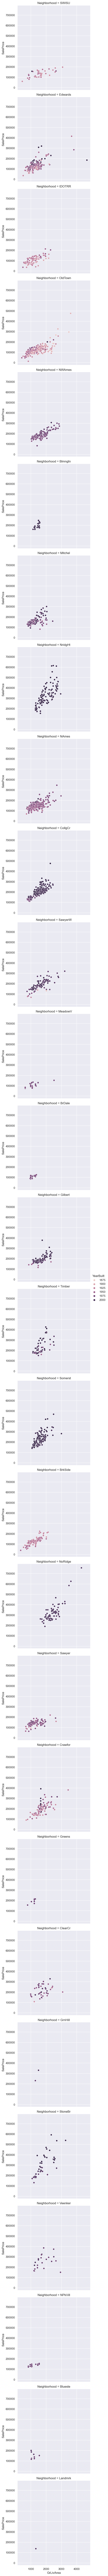

In [105]:
sns.set(rc = {'figure.figsize': (5,5)}, font_scale = 1)
sns.relplot(
    data = HousePrice, x = "GrLivArea", y = "SalePrice", 
           row ="Neighborhood",
           hue = "YearBuilt", 
           kind = "scatter")

In [106]:
HousePrice.head(5)

,address,latitude,longitude,MapRefNo,Prop_Addr,Unnamed: 0.1,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,"436, Hayward Avenue, Campustown, Ames, Story C...",42.018564,-93.651619,909176150.0,436 HAYWARD AVE,1,909176150,856,126000,30,RL,60.783784,7890,Pave,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,0,3,2010,WD,Normal
1,"3416, West Street, Union Drive, Ames, Story Co...",42.024855,-93.663671,905476230.0,3416 WEST ST,2,905476230,1049,139500,120,RL,42.000000,4235,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,No Fireplace,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,0,2,2009,WD,Normal
2,"3416, West Street, Union Drive, Ames, Story Co...",42.024855,-93.663671,905476230.0,3416 WEST ST,2,905476230,1049,139500,120,RL,42.000000,4235,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,No Fireplace,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,0,2,2009,WD,Normal
3,"320, South 2nd Street, Ames, Story County, Iow...",42.021548,-93.614068,911128020.0,320 S 2ND ST,3,911128020,1001,124900,30,C (all),60.000000,6060,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,No Fireplace,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,0,11,2007,WD,Normal
4,"1524, Douglas Avenue, Broadmoor, Ames, Story C...",42.037391,-93.612207,535377150.0,1524 DOUGLAS AVE,4,535377150,1039,114000,70,RL,80.000000,8146,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,No Fireplace,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,0,5,2009,WD,Normal


In [108]:
HousePrice1 = pd.merge(realestate[['MapRefNo', 'Prop_Addr']], HousePrice, left_on = 'MapRefNo', 
                                                             right_on = "PID", 
                                                             how = 'right')
HousePrice1.to_csv('HousePrice2.csv')

In [110]:
pip install geopy

     |████████████████████████████████| 118 kB 619 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [111]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

%matplotlib inline
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))

Current working directory: /Users/tylerkim/Downloads


In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn import neighbors
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)
sns.set(style = "whitegrid")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [116]:
#import df
train_df = pd.read_csv('train.csv', index_col=0)
test_df = pd.read_csv('test.csv', index_col=0)

In [117]:
y = train_df['SalePrice'].apply(np.log)
X = train_df.drop(["SalePrice"], axis = 1)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [125]:
predictions= reg.predict(x) 

NameError: name 'reg' is not defined

In [124]:
plt.figure(figsize=(8,8))
plt.scatter(x = np.exp(y_test), y = np.exp(pred), s = 8, label = "Test")
plt.scatter(x = np.exp(y_train), y = np.exp(ols.predict(X_train)), s = 8, label = "Train")
plt.plot([0,650000],[0,650000], color = "red")
plt.legend(loc = 0)
plt.title("Predicted Value vs True Value for MLR")
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

NameError: name 'pred' is not defined

<Figure size 576x576 with 0 Axes>